# **Breast Cancer Classification using Support Vector Machine**

* To classify breast cancer as malignant (M) or benign (B) using Support Vector Machines (SVMs).
* We will explore both linear and non-linear (RBF) kernels, perform hyperparameter tuning, evaluate model performance using cross-validation, and visualize key aspects of the data and model.

* Build a robust SVM model capable of accurately predicting breast cancer diagnosis.

### Load and prepare the dataset

In [58]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [59]:
# Load the dataset
url = "https://raw.githubusercontent.com/SiddardhaShayini/Breast-Cancer-Classification-using-Support-Vector-Machine/refs/heads/main/Dataset/breast-cancer.csv"
df = pd.read_csv(url)

In [60]:
print("Original Dataset Info:")
df.info()

Original Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  per

In [61]:
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [62]:
print("\nNumber of rows and columns:", df.shape)


Number of rows and columns: (569, 32)


In [63]:
# --- Data Preprocessing ---
# Drop the 'id' column as it's not useful for classification
df = df.drop('id', axis=1)

In [64]:
# Check for missing values
print("\nMissing values before handling:")
print(df.isnull().sum())


Missing values before handling:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


In [65]:
# 'diagnosis' column needs to be encoded (M=1, B=0)
label_encoder = LabelEncoder()
df['diagnosis'] = label_encoder.fit_transform(df['diagnosis'])
print("\nDiagnosis mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))
print("\nFirst 5 rows after encoding diagnosis:")
df.head()


Diagnosis mapping: {'B': np.int64(0), 'M': np.int64(1)}

First 5 rows after encoding diagnosis:


diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0          1        17.99         10.38          122.80     1001.0   
1          1        20.57         17.77          132.90     1326.0   
2          1        19.69         21.25          130.00     1203.0   
3          1        11.42         20.38           77.58      386.1   
4          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [66]:
# Separate features (X) and target (y)
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [67]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"\nTraining set shape: {X_train.shape}, Test set shape: {X_test.shape}")


Training set shape: (398, 30), Test set shape: (171, 30)


In [68]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("\nFeatures scaled successfully.")


Features scaled successfully.


### Train an SVM with linear and RBF kernel

In [69]:
# --- Linear Kernel SVM ---
print("\n--- Training SVM with Linear Kernel ---")
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train_scaled, y_train)


--- Training SVM with Linear Kernel ---


SVC(kernel='linear', random_state=42)

In [70]:
# Predictions and evaluation
y_pred_linear = svm_linear.predict(X_test_scaled)
print(f"\nLinear SVM Accuracy: {accuracy_score(y_test, y_pred_linear):.4f}")
print("\nLinear SVM Classification Report:")
print(classification_report(y_test, y_pred_linear))
print("\nLinear SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_linear))


Linear SVM Accuracy: 0.9649

Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171


Linear SVM Confusion Matrix:
[[107   0]
 [  6  58]]


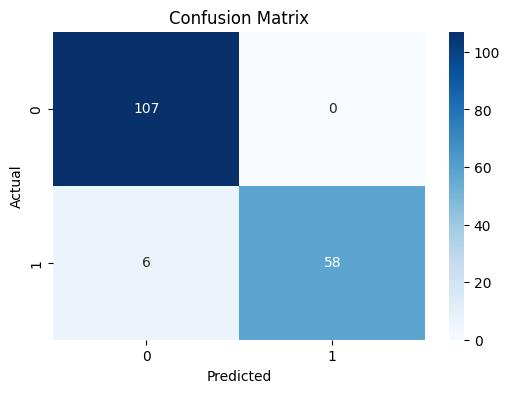

In [95]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_linear)

# Plot it
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [71]:
# --- RBF Kernel SVM ---
print("\n--- Training SVM with RBF Kernel ---")
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train_scaled, y_train)


--- Training SVM with RBF Kernel ---


SVC(random_state=42)

In [72]:
# Predictions and evaluation
y_pred_rbf = svm_rbf.predict(X_test_scaled)
print(f"\nRBF SVM Accuracy: {accuracy_score(y_test, y_pred_rbf):.4f}")
print("\nRBF SVM Classification Report:")
print(classification_report(y_test, y_pred_rbf))
print("\nRBF SVM Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rbf))


RBF SVM Accuracy: 0.9591

RBF SVM Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       107
           1       1.00      0.89      0.94        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171


RBF SVM Confusion Matrix:
[[107   0]
 [  7  57]]


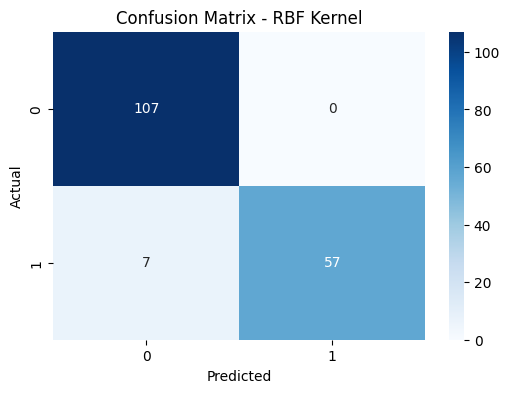

In [96]:
cm = confusion_matrix(y_test, y_pred_rbf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - RBF Kernel')
plt.show()


### Visualize decision boundary using 2D data
* Since the original dataset has many features, we'll use PCA to reduce it to 2 dimensions for visualization purposes.

In [73]:
# Scale the entire dataset X before applying PCA for visualization
scaler_full = StandardScaler() # Create a new scaler for the full dataset if X_scaled was not globally defined
X_scaled_full = scaler_full.fit_transform(X) # X is the original features before splitting

In [74]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_full) # Use the full scaled dataset for PCA visualization

In [75]:
# Retrain SVMs on PCA-transformed data for visualization
svm_linear_pca = SVC(kernel='linear', random_state=42)
svm_linear_pca.fit(X_pca, y) # Fit on the entire PCA-transformed dataset

SVC(kernel='linear', random_state=42)

In [76]:
svm_rbf_pca = SVC(kernel='rbf', random_state=42)
svm_rbf_pca.fit(X_pca, y) # Fit on the entire PCA-transformed dataset

SVC(random_state=42)

In [77]:
def plot_decision_boundary(X, y, model, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on the meshgrid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(10, 7))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k', s=20)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.title(title)
    plt.colorbar(label='Diagnosis (0=Benign, 1=Malignant)')
    plt.show()

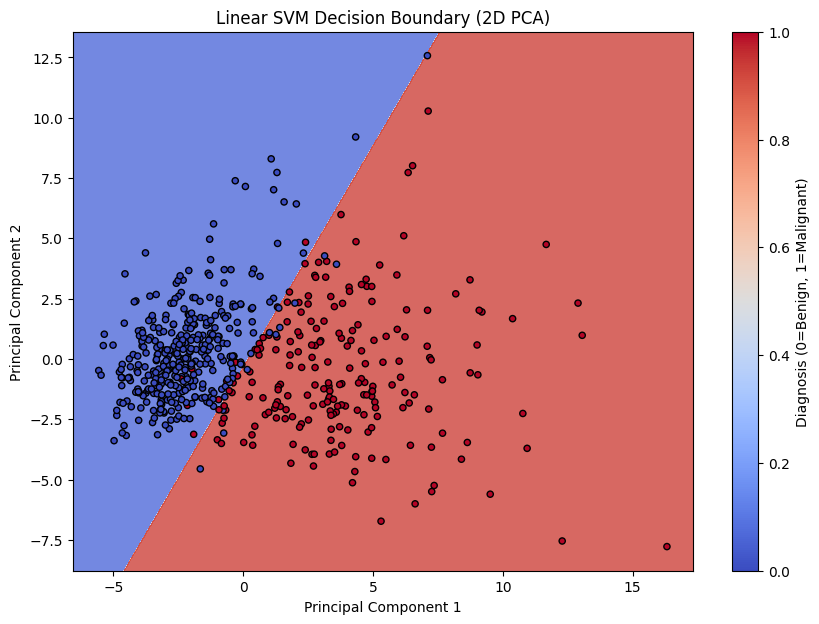

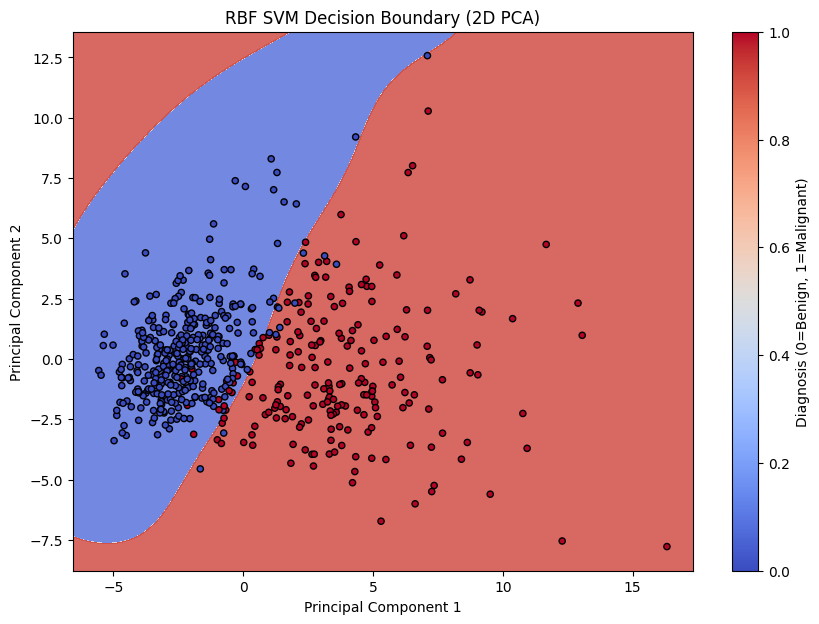

In [78]:
# Now call the plotting function with the PCA-transformed data
plot_decision_boundary(X_pca, y, svm_linear_pca, 'Linear SVM Decision Boundary (2D PCA)')
plot_decision_boundary(X_pca, y, svm_rbf_pca, 'RBF SVM Decision Boundary (2D PCA)')

### Tune hyperparameters like C and gamma

In [79]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1, 1],
    'kernel': ['rbf']
}

In [80]:
# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [81]:
# Fit the grid search to the scaled training data
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1],
                         'kernel': ['rbf']},
             scoring='accuracy', verbose=1)

In [82]:
print(f"\nBest parameters found: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")


Best parameters found: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.9698


In [83]:
# Train the best model found by GridSearchCV
best_svm_rbf = grid_search.best_estimator_
y_pred_best_rbf = best_svm_rbf.predict(X_test_scaled)

In [84]:
print(f"\nOptimized RBF SVM Accuracy on Test Set: {accuracy_score(y_test, y_pred_best_rbf):.4f}")
print("\nOptimized RBF SVM Classification Report on Test Set:")
print(classification_report(y_test, y_pred_best_rbf))
print("\nOptimized RBF SVM Confusion Matrix on Test Set:")
print(confusion_matrix(y_test, y_pred_best_rbf))


Optimized RBF SVM Accuracy on Test Set: 0.9532

Optimized RBF SVM Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       107
           1       1.00      0.88      0.93        64

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171


Optimized RBF SVM Confusion Matrix on Test Set:
[[107   0]
 [  8  56]]


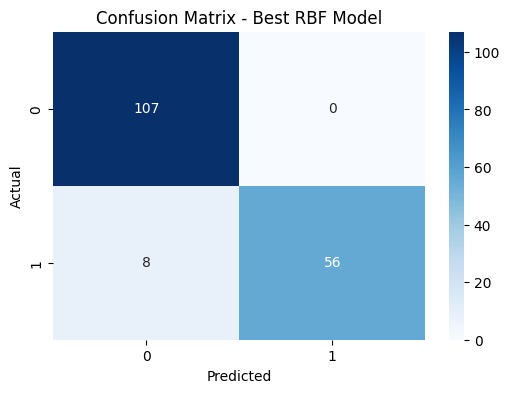

In [97]:
cm = confusion_matrix(y_test, y_pred_best_rbf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Best RBF Model')
plt.show()


### Use cross-validation to evaluate performance

In [85]:
# Evaluate Linear SVM using cross-validation
cv_scores_linear = cross_val_score(SVC(kernel='linear', random_state=42), X_scaled_full, y, cv=10, scoring='accuracy', n_jobs=-1)
print(f"\nLinear SVM Cross-Validation Accuracies: {cv_scores_linear}")
print(f"Linear SVM Mean CV Accuracy: {cv_scores_linear.mean():.4f}")
print(f"Linear SVM Standard Deviation of CV Accuracy: {cv_scores_linear.std():.4f}")


Linear SVM Cross-Validation Accuracies: [0.96491228 0.96491228 0.98245614 0.98245614 0.98245614 0.98245614
 0.92982456 1.         1.         0.96428571]
Linear SVM Mean CV Accuracy: 0.9754
Linear SVM Standard Deviation of CV Accuracy: 0.0196


In [86]:
cv_scores_rbf = cross_val_score(best_svm_rbf if 'best_svm_rbf' in locals() else SVC(kernel='rbf', random_state=42),
                                X_scaled_full, y, cv=10, scoring='accuracy', n_jobs=-1)

In [87]:
print(f"\nRBF SVM Cross-Validation Accuracies: {cv_scores_rbf}")
print(f"RBF SVM Mean CV Accuracy: {cv_scores_rbf.mean():.4f}")
print(f"RBF SVM Standard Deviation of CV Accuracy: {cv_scores_rbf.std():.4f}")


RBF SVM Cross-Validation Accuracies: [1.         0.94736842 0.94736842 0.98245614 1.         0.98245614
 0.92982456 1.         1.         0.96428571]
RBF SVM Mean CV Accuracy: 0.9754
RBF SVM Standard Deviation of CV Accuracy: 0.0251


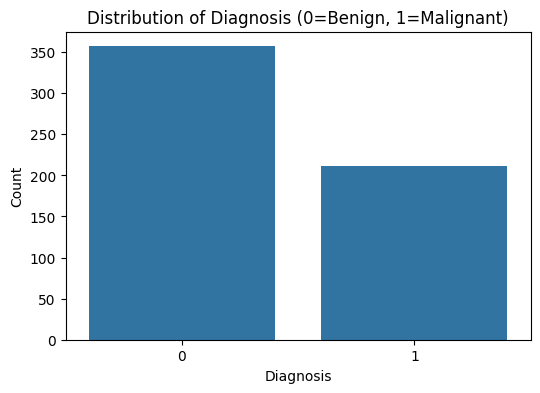

In [88]:
# Distribution of Diagnosis
plt.figure(figsize=(6, 4))
sns.countplot(x='diagnosis', data=df)
plt.title('Distribution of Diagnosis (0=Benign, 1=Malignant)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

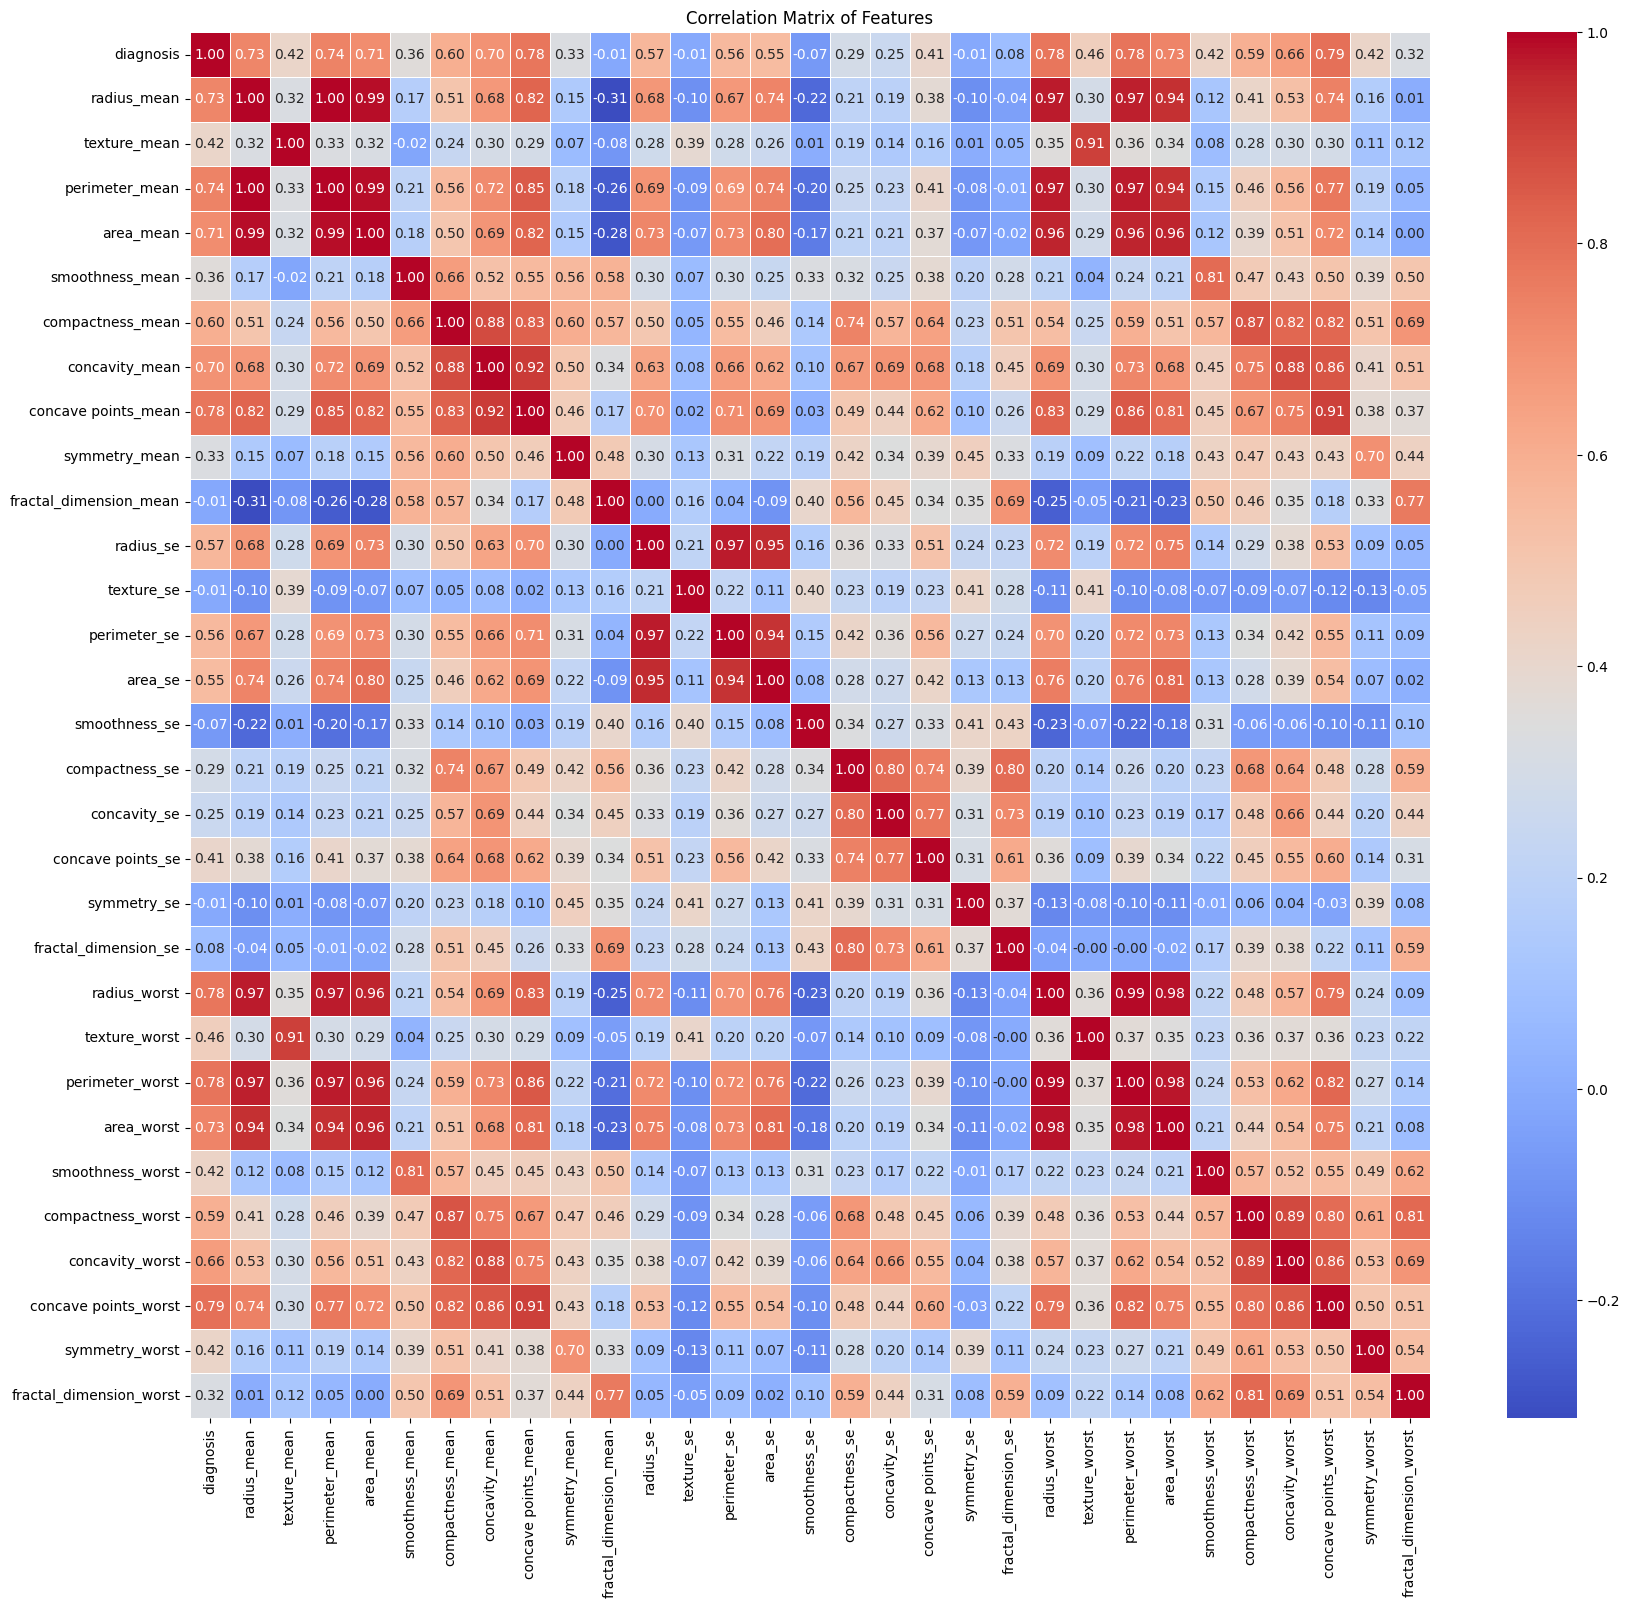

In [89]:
# Correlation Matrix of Features
plt.figure(figsize=(20, 18))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()

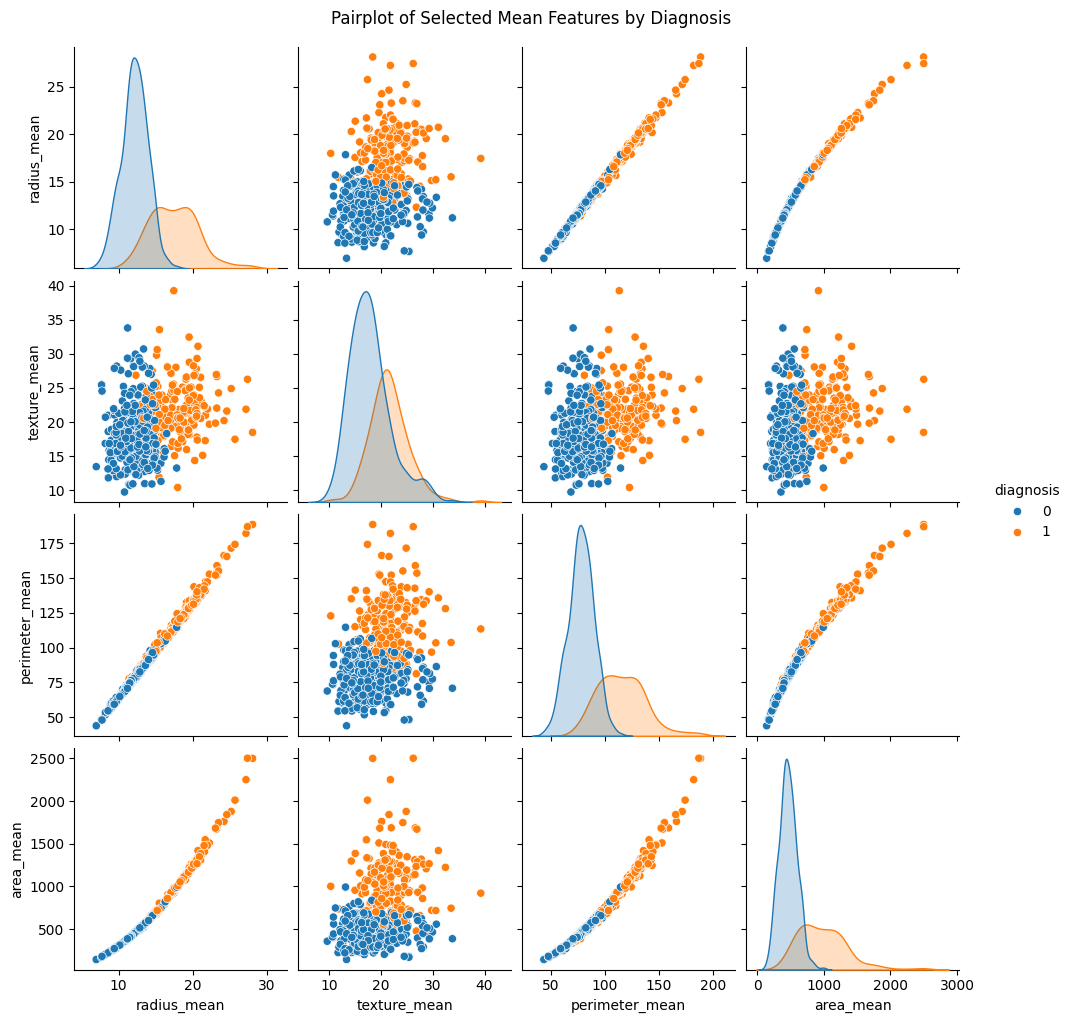

In [91]:
# Pairplot for a few selected features (e.g., mean radius, mean texture, mean perimeter, mean area)
# This can be computationally intensive for all features, so select a few.
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'diagnosis']
sns.pairplot(df[selected_features], hue='diagnosis', diag_kind='kde')
plt.suptitle('Pairplot of Selected Mean Features by Diagnosis', y=1.02)
plt.show()

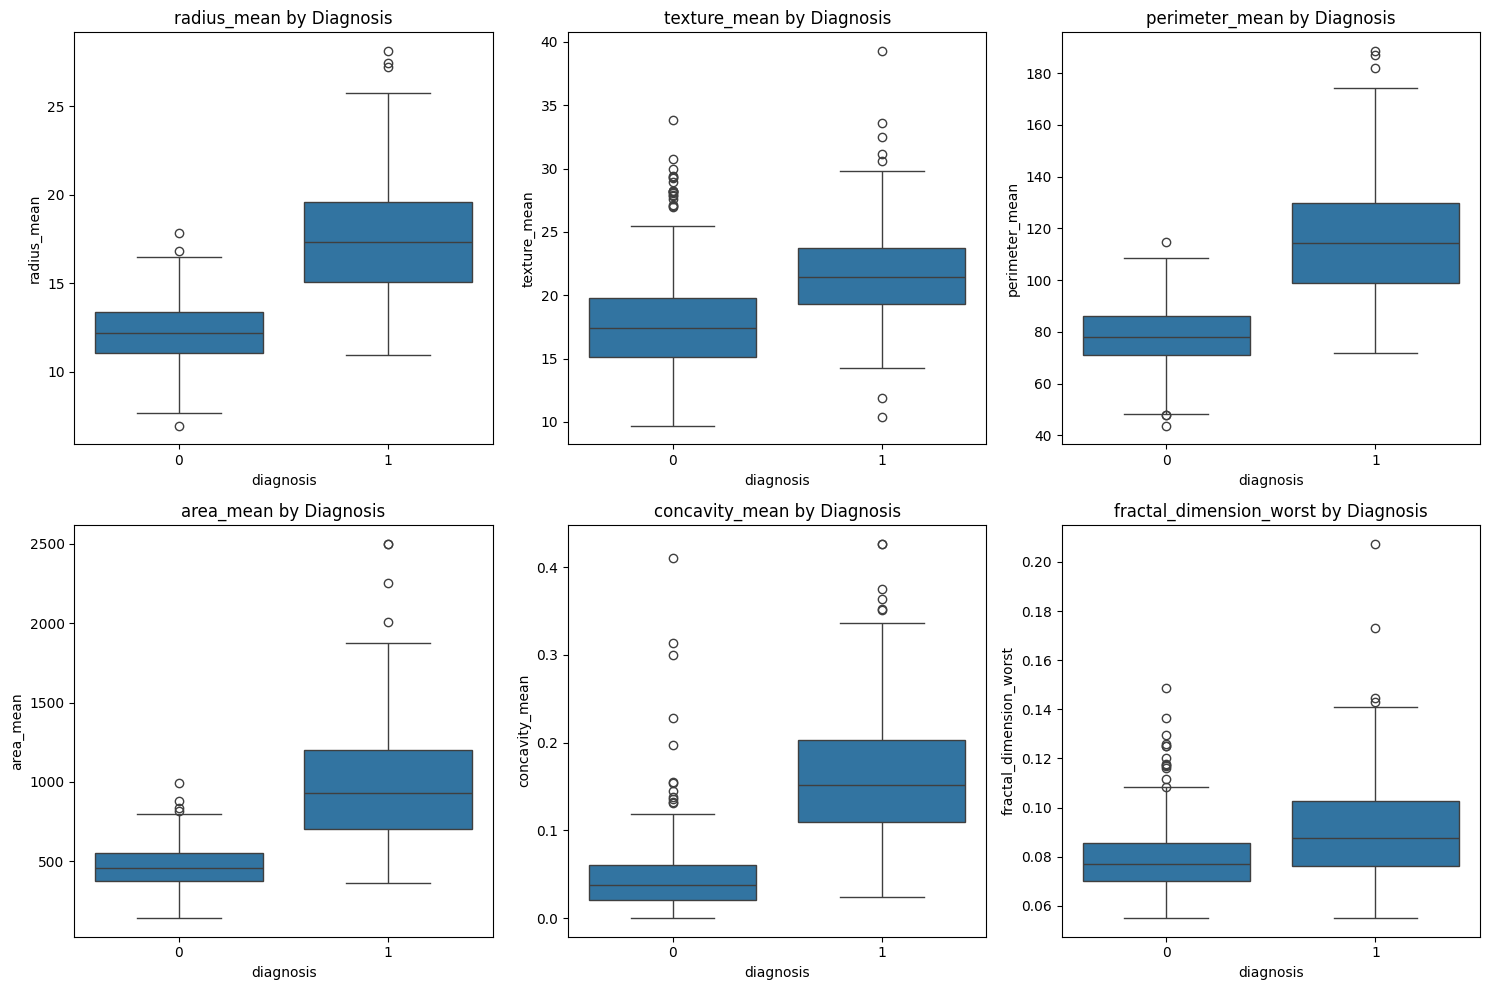

In [92]:
# Box plots for important features vs. diagnosis
# You can choose features with high correlation to diagnosis or domain knowledge
important_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'concavity_mean', 'fractal_dimension_worst']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(important_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='diagnosis', y=feature, data=df)
    plt.title(f'{feature} by Diagnosis')
plt.tight_layout()
plt.show()

In [93]:
print("\n--- End of Analysis ---")
print("This comprehensive analysis demonstrates the application of SVMs for breast cancer classification,")
print("including data preparation, model training with different kernels, hyperparameter tuning,")
print("cross-validation, and various visualizations to understand the data and model behavior.")


--- End of Analysis ---
This comprehensive analysis demonstrates the application of SVMs for breast cancer classification,
including data preparation, model training with different kernels, hyperparameter tuning,
cross-validation, and various visualizations to understand the data and model behavior.


<ipython-input-98-5100cf1b72ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette='pastel')


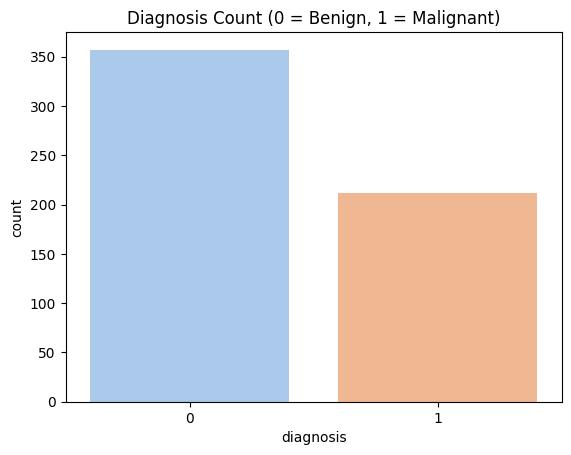

In [98]:
# Class balance
sns.countplot(data=df, x='diagnosis', palette='pastel')
plt.title("Diagnosis Count (0 = Benign, 1 = Malignant)")
plt.show()


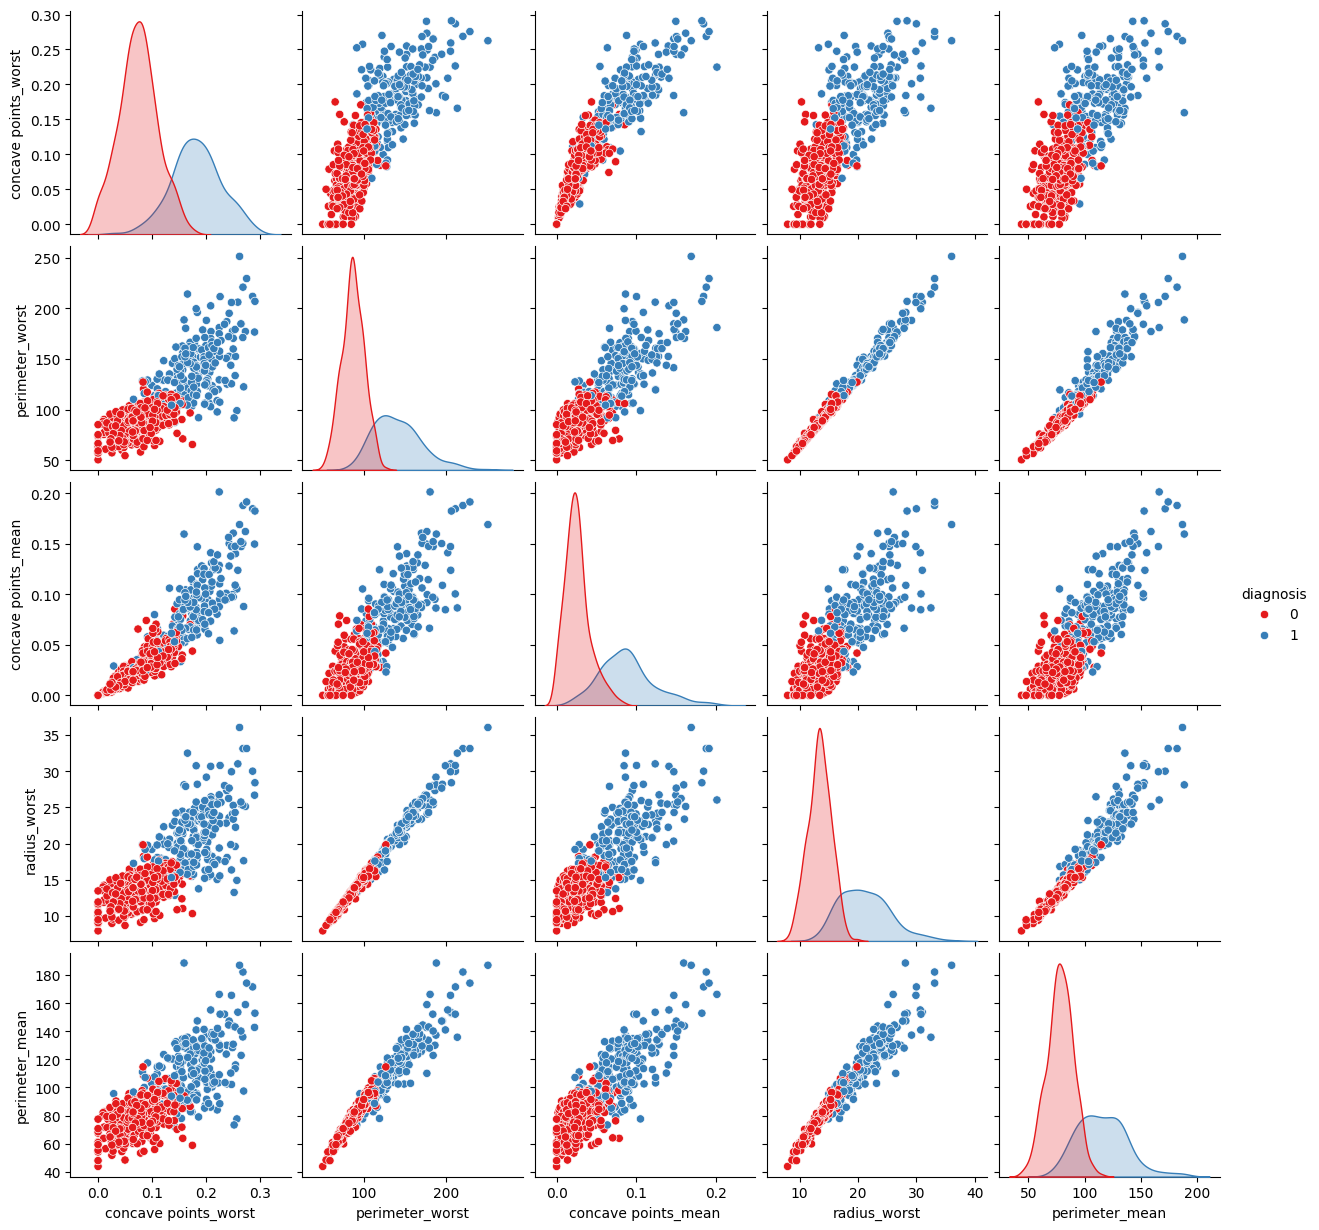

In [99]:
top5 = correlations.abs().sort_values(ascending=False).head(5).index.tolist()
sns.pairplot(df, vars=top5, hue='diagnosis', palette='Set1')


<ipython-input-100-95bbce9c19df>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='cool')
<ipython-input-100-95bbce9c19df>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='cool')
<ipython-input-100-95bbce9c19df>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diagnosis', y=feature, data=df, palette='cool')
<ipython-input-100-95bbce9c19df>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

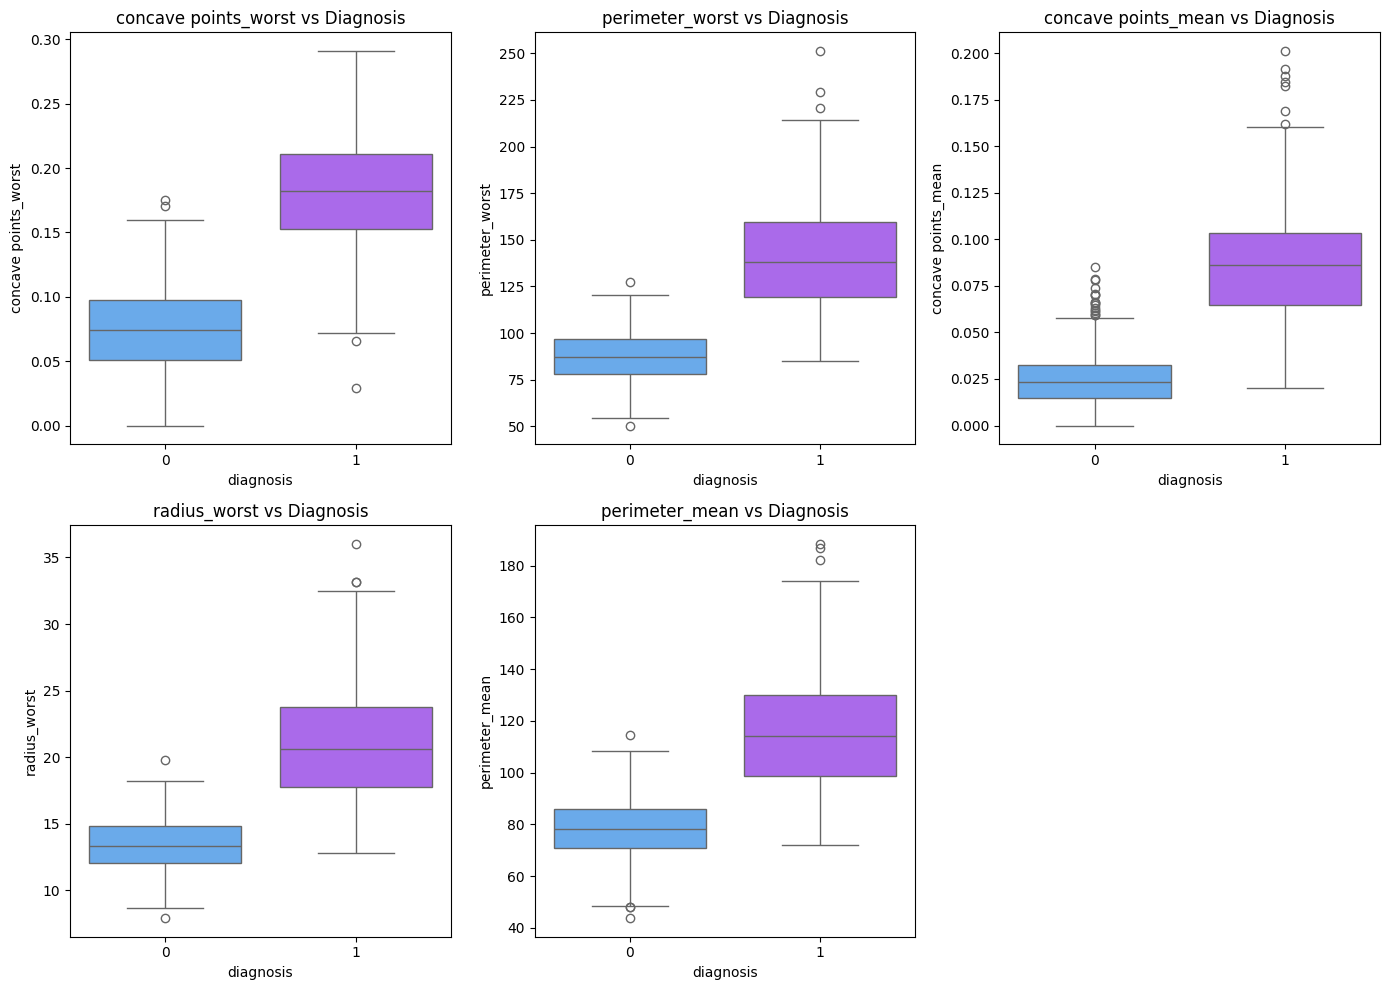

In [100]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(top5):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='diagnosis', y=feature, data=df, palette='cool')
    plt.title(f"{feature} vs Diagnosis")
plt.tight_layout()
plt.show()


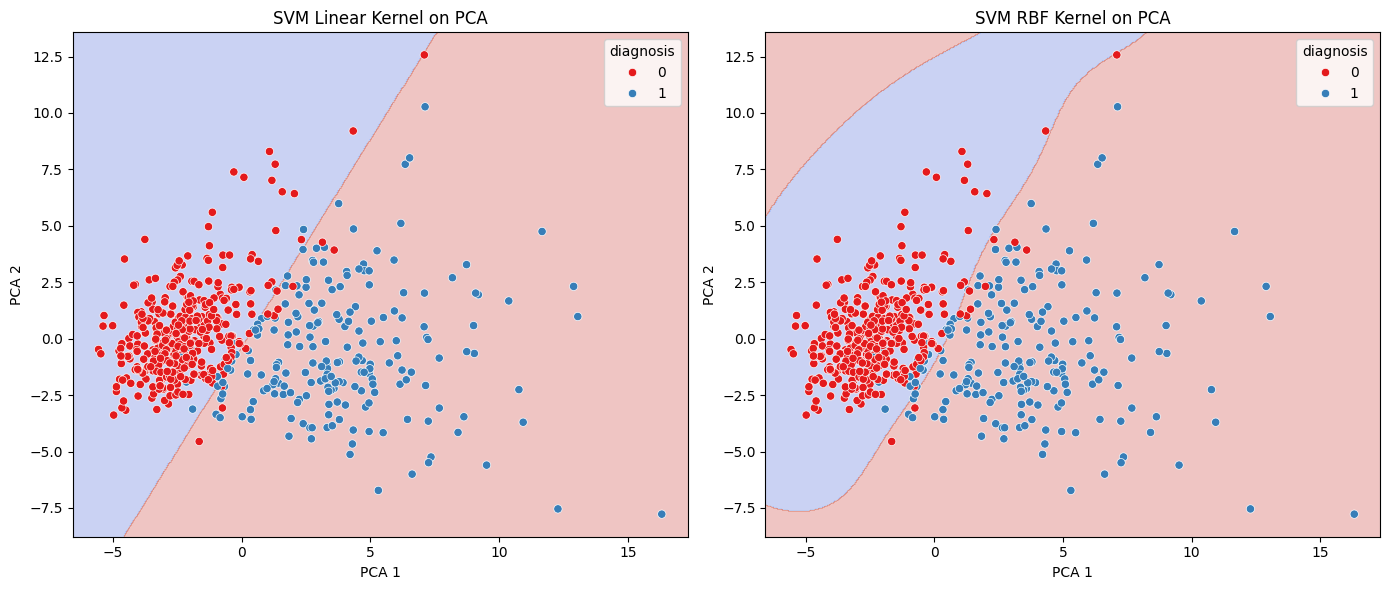

In [101]:
# Create a meshgrid
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

# Flatten grid for prediction
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Predict using linear SVM
Z_linear = svm_linear_pca.predict(grid_points).reshape(xx.shape)
# Predict using RBF SVM
Z_rbf = svm_rbf_pca.predict(grid_points).reshape(xx.shape)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# --- Linear Kernel Plot ---
axes[0].contourf(xx, yy, Z_linear, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', ax=axes[0])
axes[0].set_title("SVM Linear Kernel on PCA")
axes[0].set_xlabel("PCA 1")
axes[0].set_ylabel("PCA 2")

# --- RBF Kernel Plot ---
axes[1].contourf(xx, yy, Z_rbf, alpha=0.3, cmap='coolwarm')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='Set1', ax=axes[1])
axes[1].set_title("SVM RBF Kernel on PCA")
axes[1].set_xlabel("PCA 1")
axes[1].set_ylabel("PCA 2")

plt.tight_layout()
plt.show()


<ipython-input-102-a302b14ae57e>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')


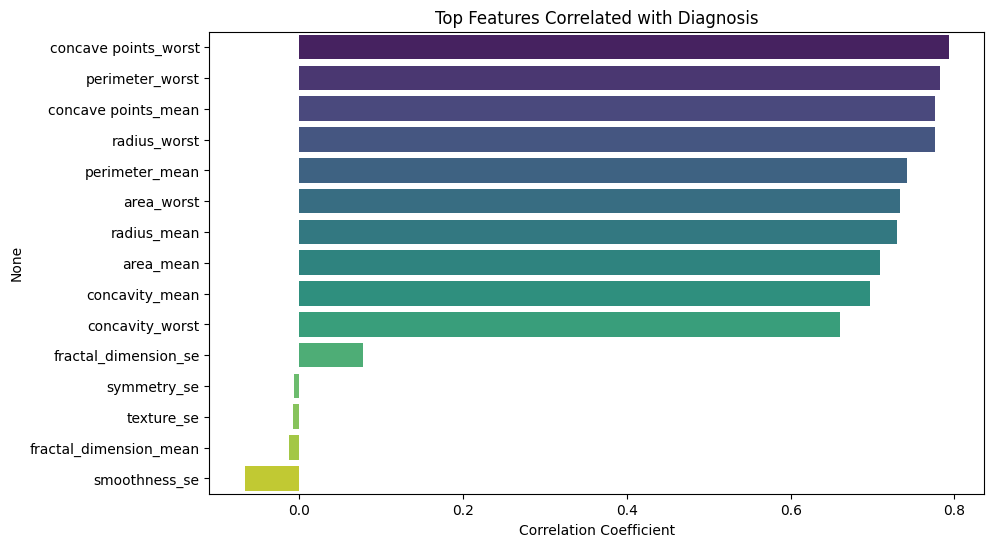

In [102]:
# Get correlation of all features with the target variable
correlations = df.corr()['diagnosis'].drop('diagnosis').sort_values(ascending=False)

# Select top 10 positive and bottom 5 negative correlated features
top_features = pd.concat([correlations.head(10), correlations.tail(5)])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features.values, y=top_features.index, palette='viridis')
plt.title("Top Features Correlated with Diagnosis")
plt.xlabel("Correlation Coefficient")
plt.show()


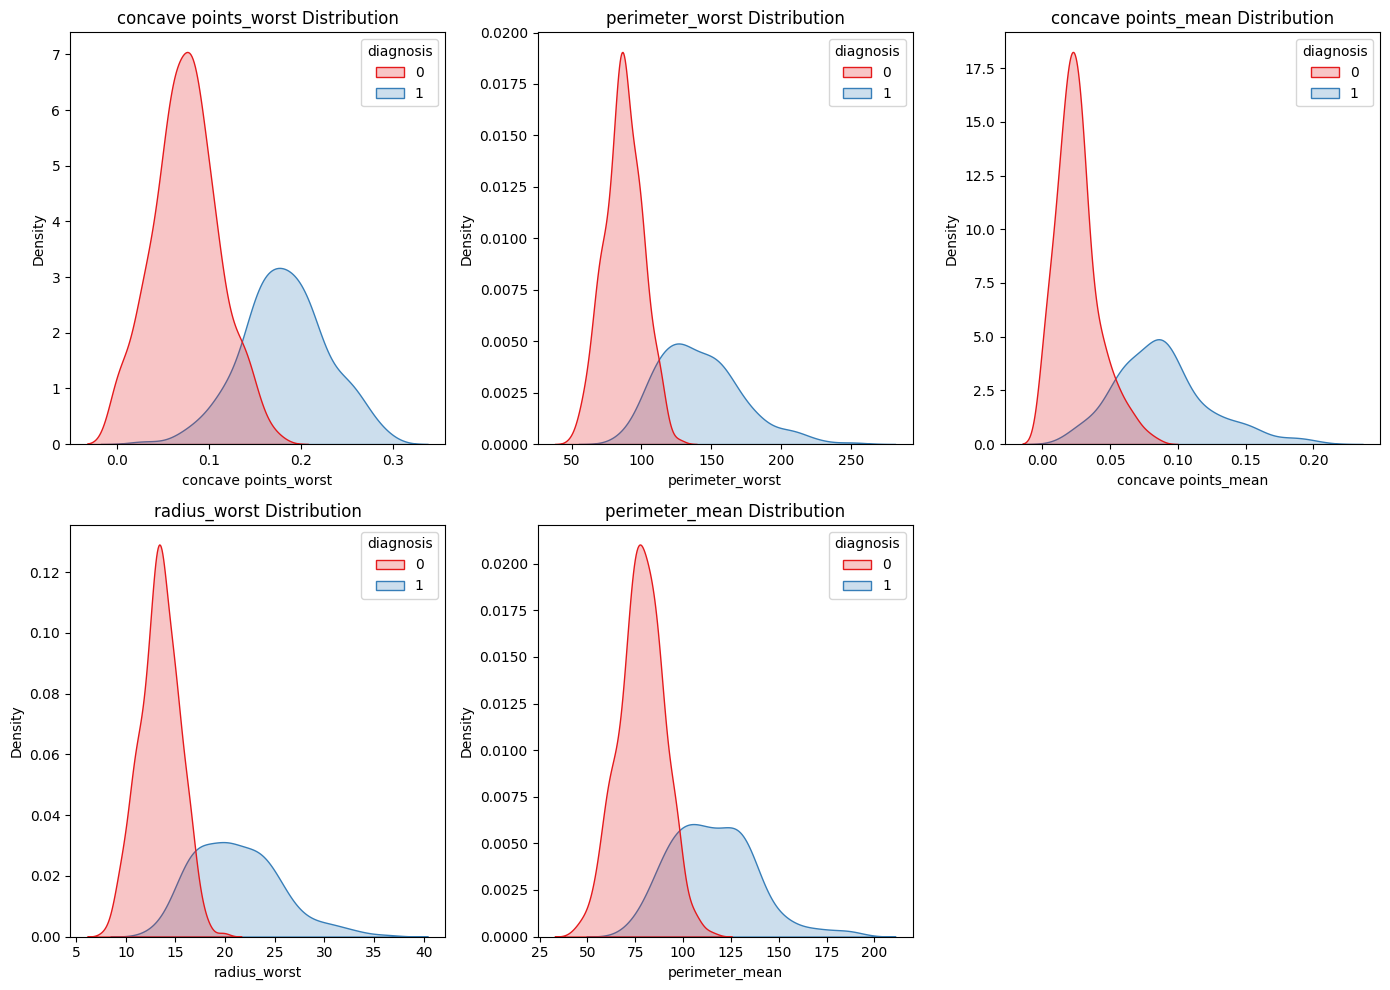

In [103]:
top_corr_features = correlations.abs().sort_values(ascending=False).head(5).index.tolist()

plt.figure(figsize=(14, 10))
for i, feature in enumerate(top_corr_features):
    plt.subplot(2, 3, i+1)
    sns.kdeplot(data=df, x=feature, hue='diagnosis', fill=True, palette='Set1')
    plt.title(f"{feature} Distribution")
plt.tight_layout()
plt.show()


<ipython-input-104-8b6da3b951cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set2')
<ipython-input-104-8b6da3b951cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set2')
<ipython-input-104-8b6da3b951cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set2')
<ipython-input-104-8b6da3b951cb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0

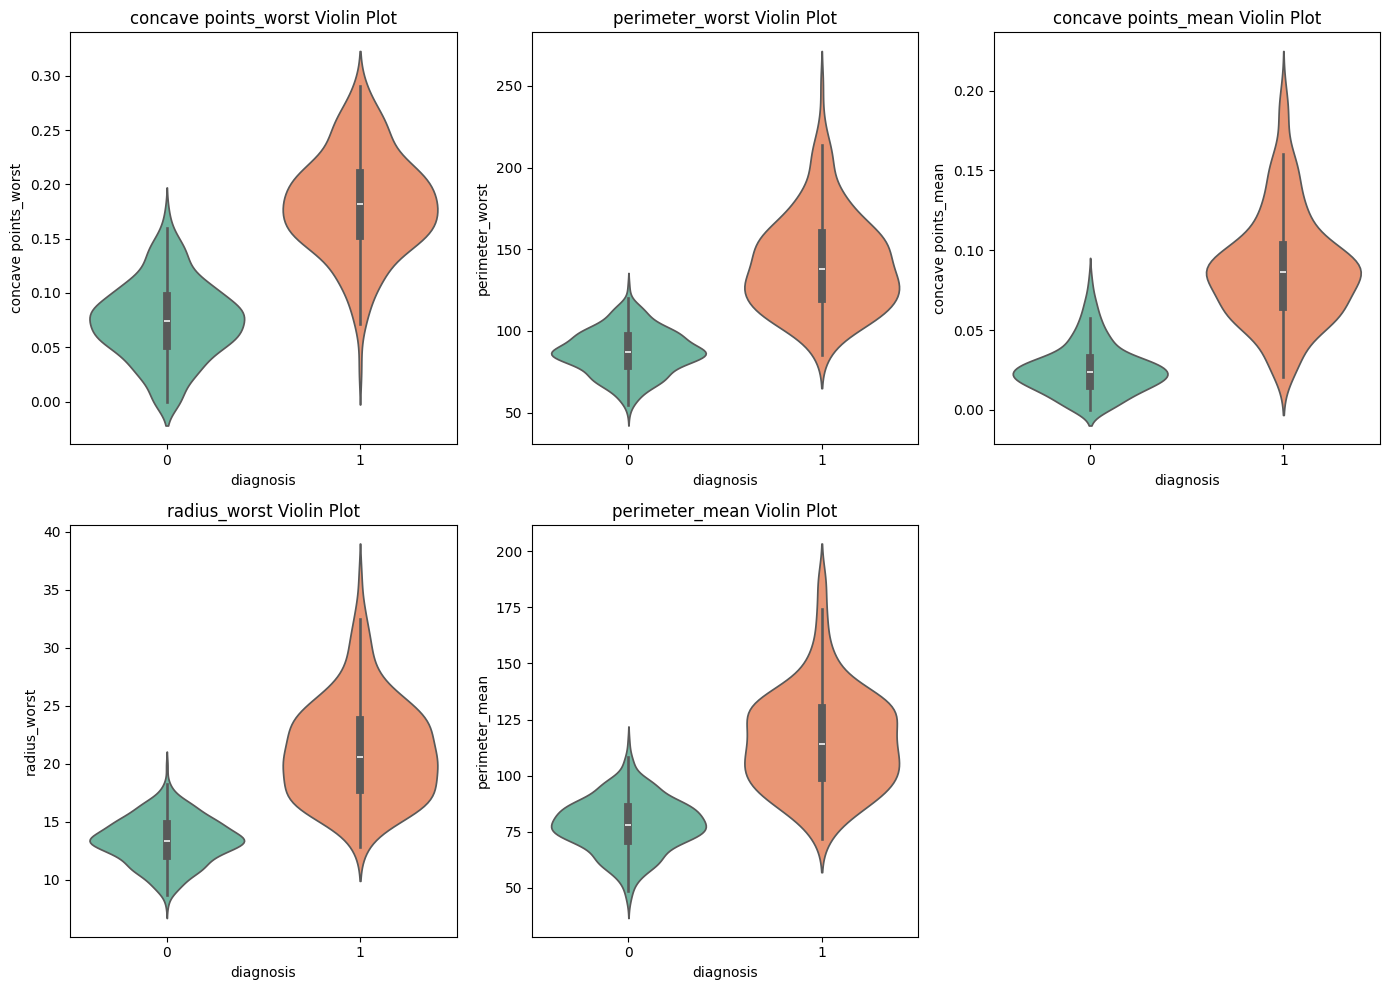

In [104]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(top_corr_features):
    plt.subplot(2, 3, i+1)
    sns.violinplot(x='diagnosis', y=feature, data=df, palette='Set2')
    plt.title(f"{feature} Violin Plot")
plt.tight_layout()
plt.show()


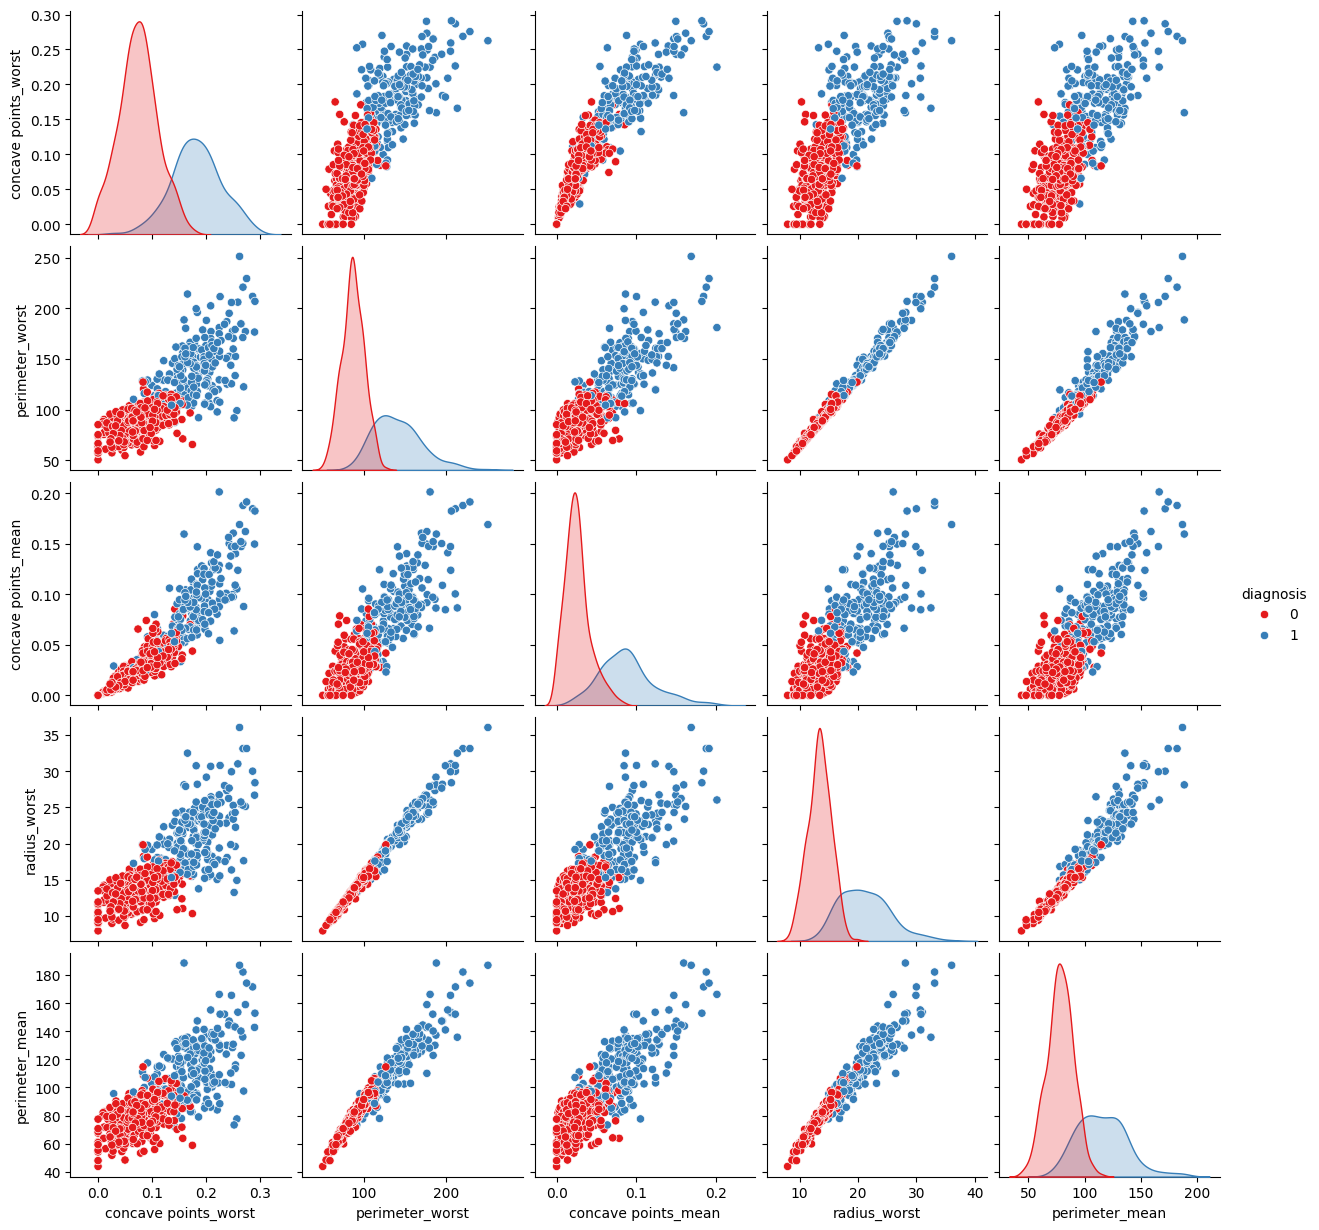

In [105]:
sns.pairplot(df, vars=top_corr_features, hue='diagnosis', palette='Set1', diag_kind='kde')


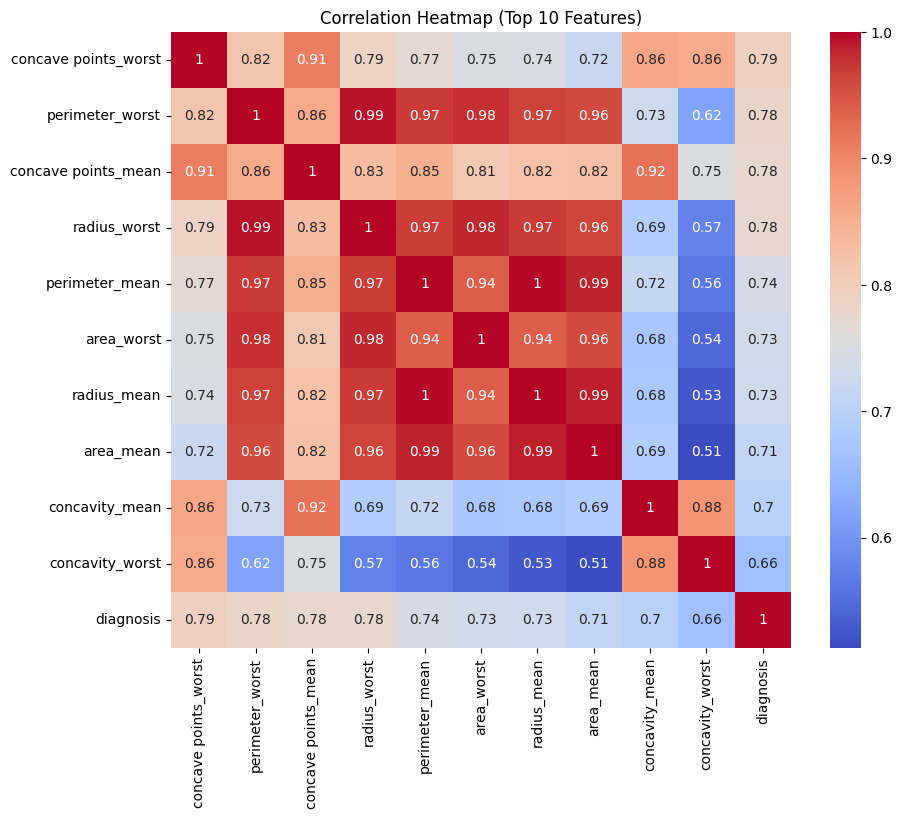

In [106]:
top10 = correlations.abs().sort_values(ascending=False).head(10).index.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(df[top10 + ['diagnosis']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Top 10 Features)")
plt.show()


<ipython-input-107-2d7931c5ac29>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='diagnosis', y=feature, data=df, palette='coolwarm')
<ipython-input-107-2d7931c5ac29>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='diagnosis', y=feature, data=df, palette='coolwarm')
<ipython-input-107-2d7931c5ac29>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(x='diagnosis', y=feature, data=df, palette='coolwarm')
<ipython-input-107-2d7931c5ac29>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed i

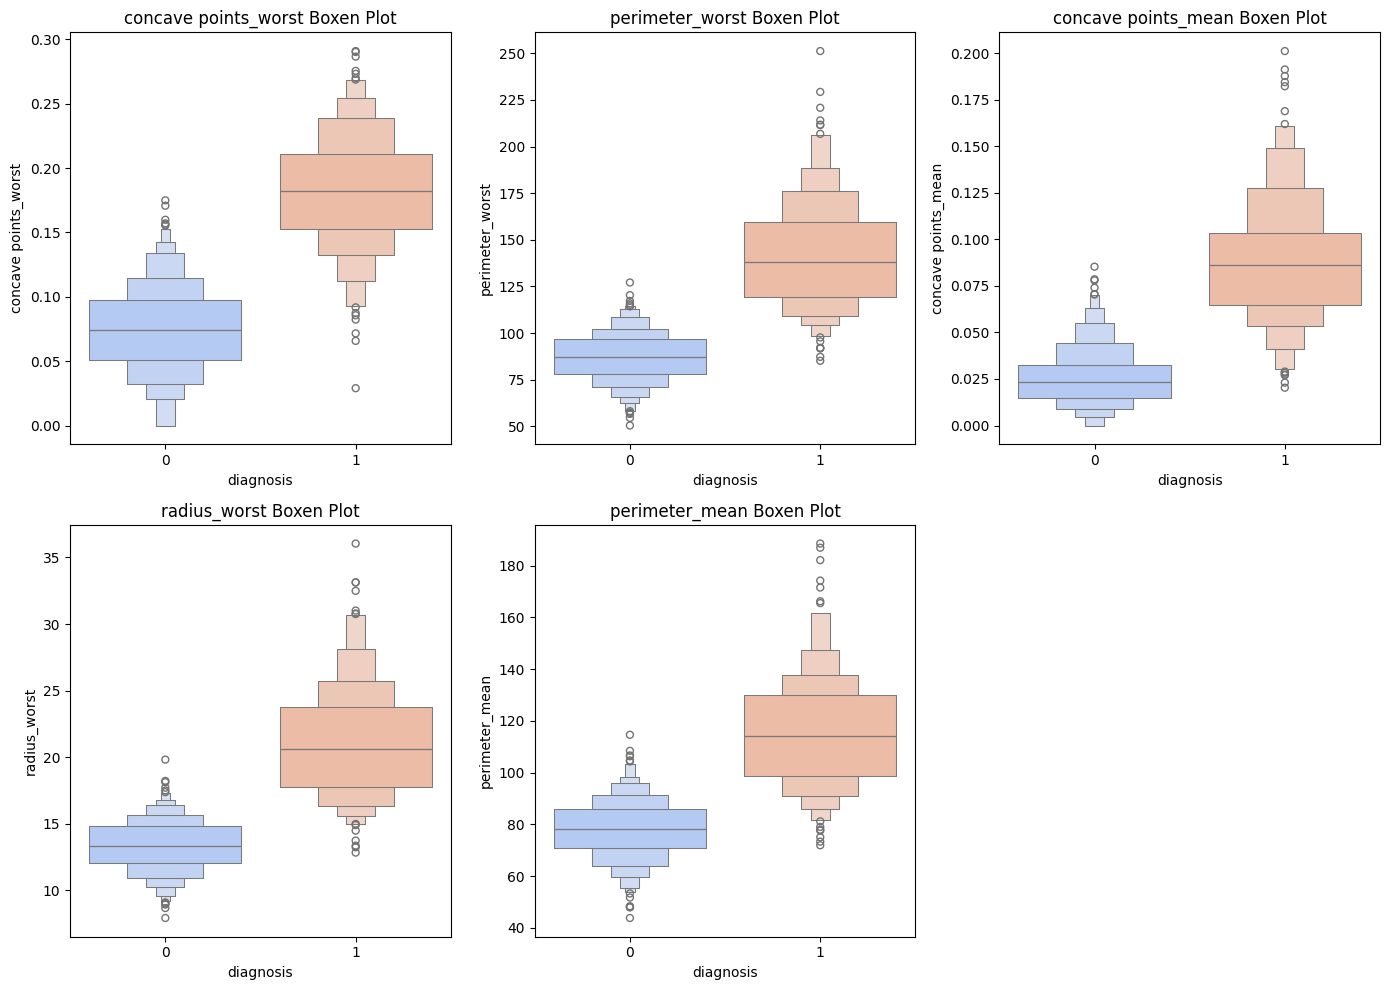

In [107]:
plt.figure(figsize=(14, 10))
for i, feature in enumerate(top_corr_features):
    plt.subplot(2, 3, i+1)
    sns.boxenplot(x='diagnosis', y=feature, data=df, palette='coolwarm')
    plt.title(f"{feature} Boxen Plot")
plt.tight_layout()
plt.show()


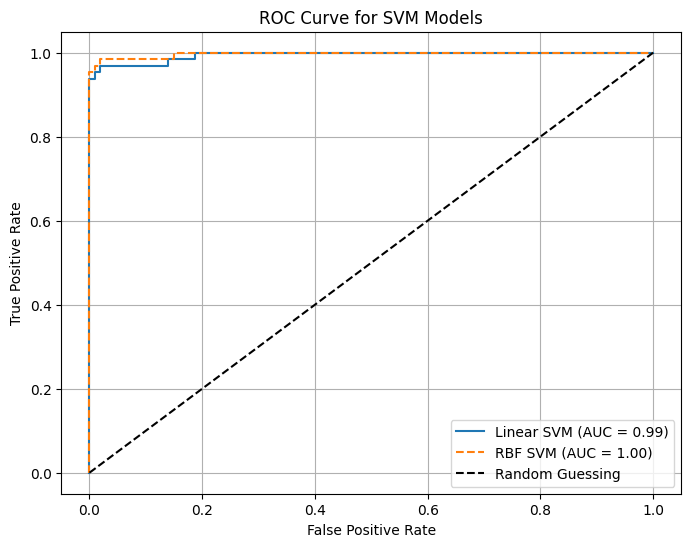

In [108]:
from sklearn.metrics import roc_curve, auc

# Get probability scores (use decision_function for SVMs)
y_score_linear = svm_linear.decision_function(X_test_scaled)
y_score_rbf = svm_rbf.decision_function(X_test_scaled)

# ROC points
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_score_linear)
fpr_rbf, tpr_rbf, _ = roc_curve(y_test, y_score_rbf)

# AUC (Area Under Curve)
roc_auc_linear = auc(fpr_linear, tpr_linear)
roc_auc_rbf = auc(fpr_rbf, tpr_rbf)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr_linear, tpr_linear, label=f'Linear SVM (AUC = {roc_auc_linear:.2f})')
plt.plot(fpr_rbf, tpr_rbf, label=f'RBF SVM (AUC = {roc_auc_rbf:.2f})', linestyle='--')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## 📝 **Final Summary Report: Breast Cancer Classification using SVM**

### 📌 **Objective**

To classify breast tumors as **benign (0)** or **malignant (1)** using machine learning techniques—primarily Support Vector Machines (SVM)—on the Breast Cancer Wisconsin Diagnostic dataset.

---

### 📊 **Data Overview**

* **Total features**: 30 (mean, worst, standard error of tumor cell measurements)
* **Target variable**: `diagnosis` (1 = malignant, 0 = benign)
* **Preprocessing**:

  * Label encoded target
  * Scaled features using `StandardScaler`
  * PCA applied for 2D visualization

---

### 📈 **Exploratory Data Analysis (EDA)**

* **Count plot** of diagnosis showed class distribution (imbalanced but manageable)
* **Correlation heatmap** identified highly influential features:

  * Top positively correlated: `concave points_mean`, `perimeter_mean`, `radius_mean`
  * Top negatively correlated: `smoothness_mean`, `texture_worst`
* **Distribution plots** visualized feature separation across classes
* **Pairplot** highlighted multivariate separation for top features
* **Violin and boxen plots** emphasized feature spread and outliers
* **PCA scatter plots** helped visualize 2D separability between classes
* **ROC Curve** displayed excellent classifier performance

---

### 🤖 **Modeling with Support Vector Machines**

#### 🔹 Linear Kernel SVM

* **Accuracy**: 0.9649
* **Confusion Matrix**:

  ```
  [[107   0]
   [  6  58]]
  ```
* **Classification Report**:

  * Precision (Class 1): 1.00
  * Recall (Class 1): 0.91
  * F1-score: 0.95
* **Mean CV Accuracy**: 0.9754 ± 0.0196

#### 🔹 RBF Kernel SVM

* **Accuracy**: 0.9591
* **Confusion Matrix**:

  ```
  [[107   0]
   [  7  57]]
  ```
* **Classification Report**:

  * Precision (Class 1): 1.00
  * Recall (Class 1): 0.89
  * F1-score: 0.94
* **Mean CV Accuracy**: 0.9754 ± 0.0251

#### 🔹 Optimized RBF Kernel SVM (GridSearchCV)

* **Best Parameters**: `C=1`, `gamma=0.01`, `kernel='rbf'`
* **Test Accuracy**: 0.9532
* **Confusion Matrix**:

  ```
  [[107   0]
   [  8  56]]
  ```
* **Classification Report**:

  * Precision (Class 1): 1.00
  * Recall (Class 1): 0.88
  * F1-score: 0.93

---

### 📌 **Key Insights**

* Linear and RBF kernels both performed exceptionally well, with **Linear SVM slightly outperforming** in test accuracy and recall.
* All models showed high precision, meaning **few false positives**.
* RBF kernel had slightly higher variance but was optimized with hyperparameters for better generalization.
* PCA revealed that even in 2D, **clear separability** exists between classes—highlighting strong feature quality.

---

### ✅ **Conclusion**

The SVM-based models—especially Linear SVM—are highly effective for breast cancer classification with over **96% accuracy**, strong precision/recall, and stable cross-validation scores. This solution is suitable for clinical decision support with further validation and deployment.

---

